In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.metrics import accuracy_score
from sklearn.model_selection import  train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [161]:
# Load Titanic dataset
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [162]:
#selecting the relevant features
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']
target =  'Survived'

In [165]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [167]:
# Drop rows with missing target values
titanic = titanic.dropna(subset=[target])
# Convert categorical variables
titanic = pd.get_dummies(titanic, columns=['Sex', 'Embarked'], drop_first=True)


In [169]:
X = titanic[features]
y = titanic[target]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [171]:
#initialising the model
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(f'Accuracy :{accuracy_score(y_test,y_pred):.4f}')

Accuracy :0.8101


In [172]:
# Hyperparameter Tuning with Grid Search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, verbose=1, n_jobs=-1)
start_time = time.time()
grid_search.fit(X_train, y_train)
grid_time = time.time() - start_time

y_pred_grid = grid_search.best_estimator_.predict(X_test)
print(f'Grid Search Accuracy: {accuracy_score(y_test, y_pred_grid):.4f}')
print(f'Grid Search Time: {grid_time:.2f} seconds')


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Grid Search Accuracy: 0.8212
Grid Search Time: 12.76 seconds


In [174]:
# Hyperparameter Tuning with Random Search
param_dist = {
    'n_estimators': np.arange(50, 200, 50),
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_dist, n_iter=5, cv=5, verbose=1, n_jobs=-1, random_state=42)
start_time = time.time()
random_search.fit(X_train, y_train)
random_time = time.time() - start_time

y_pred_random = random_search.best_estimator_.predict(X_test)
print(f'Random Search Accuracy: {accuracy_score(y_test, y_pred_random):.4f}')
print(f'Random Search Time: {random_time:.2f} seconds')


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Random Search Accuracy: 0.8212
Random Search Time: 2.77 seconds


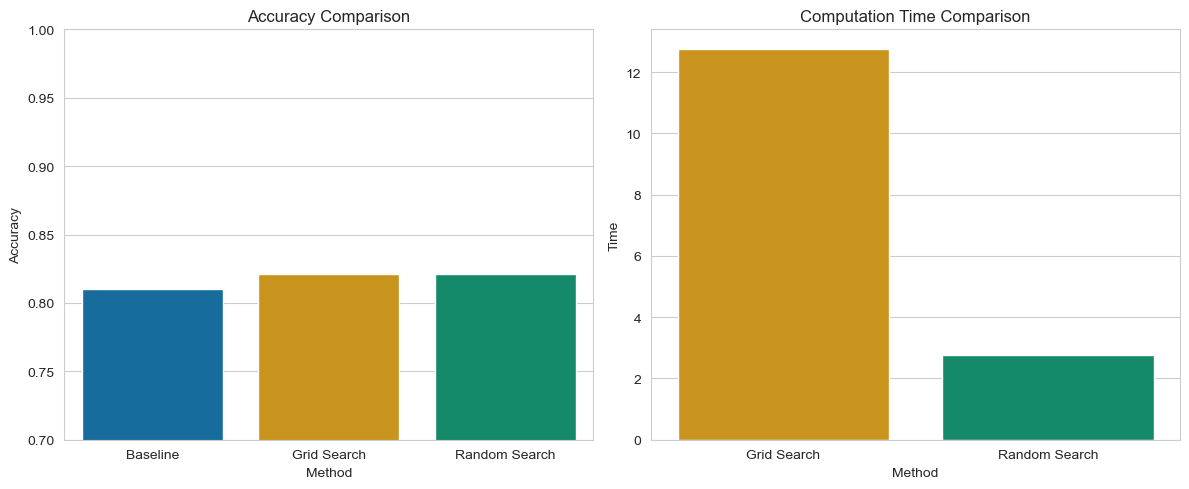

In [179]:
# Accuracy and time data
accuracy_data = pd.DataFrame({
    'Method': ['Baseline', 'Grid Search', 'Random Search'],
    'Accuracy': [accuracy_score(y_test, y_pred),
                 accuracy_score(y_test, y_pred_grid),
                 accuracy_score(y_test, y_pred_random)]
})

time_data = pd.DataFrame({
    'Method': ['Grid Search', 'Random Search'],
    'Time': [grid_time, random_time]
})

# Define colorblind-safe palette
cb_palette = {
    'Baseline': '#0072B2',       # Blue
    'Grid Search': '#E69F00',    # Orange
    'Random Search': '#009E73'   # Green
}

# Plotting
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Accuracy Comparison
sns.barplot(data=accuracy_data, x='Method', y='Accuracy', hue='Method',
            palette=cb_palette, ax=axes[0], legend=False)
axes[0].set_title('Accuracy Comparison')
axes[0].set_ylim(0.7, 1.0)

# Time Comparison
sns.barplot(data=time_data, x='Method', y='Time', hue='Method',
            palette=cb_palette, ax=axes[1], legend=False)
axes[1].set_title('Computation Time Comparison')

plt.tight_layout()
plt.show()
